# **Introduction:**

This file serves to deploy an ANFIS model that had been developed.

**Date Created: 4/2/2025**

**Date Modified: 4/2/2025**

# **Import Packages:**

This section imports the necessary packages.

In [2]:
# import packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError
from sklearn.preprocessing import StandardScaler
from pickle import load
from ANFIS_Custom_Layers import *

# **Load the Model:**

This section loads the model such that it may be used for inference.

In [3]:
# define the dictionary of custom objects:
custom_objects = {
    # # layers:
    'MF_Layer'          : MF_Layer,
    'FS_Layer'          : FS_Layer,
    'NM_Layer'          : NM_Layer,
    'CN_Layer'          : CN_Layer,
    'O_Layer'           : O_Layer,

    # other:
    'OrderedConstraint' : OrderedConstraint(),
    'mse'               : MeanSquaredError()
}

# load the model:
model = load_model('anfis_model.h5', custom_objects = custom_objects)

# load the scaler:
scaler = load(open('scaler.pkl', 'rb'))

# **Utilize the Loaded Model:**

This section examines if the model actually worked and loaded correctly, by testing it on an input sequence. 

In [4]:
# define an input sequence:
input_data = np.array([[0, 0, 0]])

# scale the input using the scaler:
scaled_input = scaler.transform(input_data)

# predict using the model:
prediction = model.predict(scaled_input)
print(f'predicted suitability is: {prediction}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
predicted suitability is: [[9.028122]]


Check membership functions:

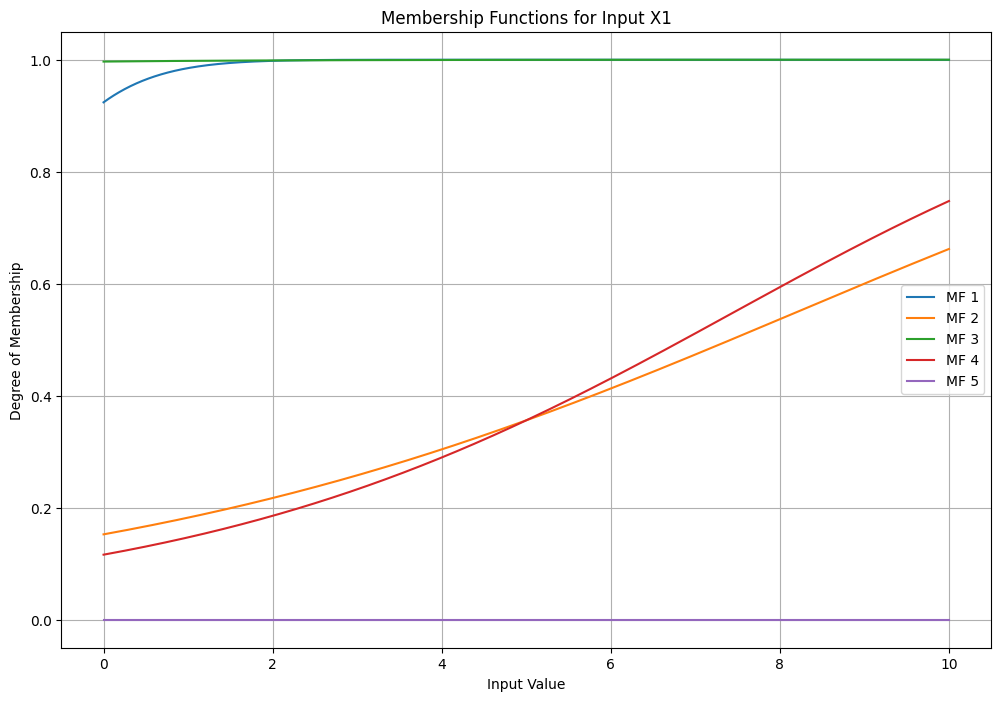

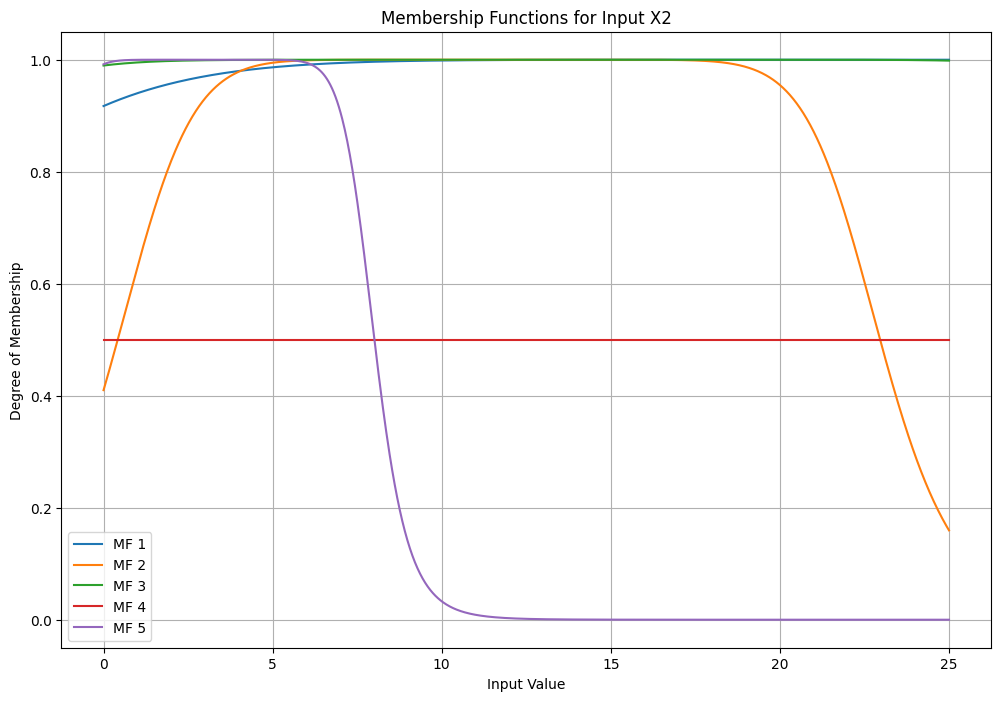

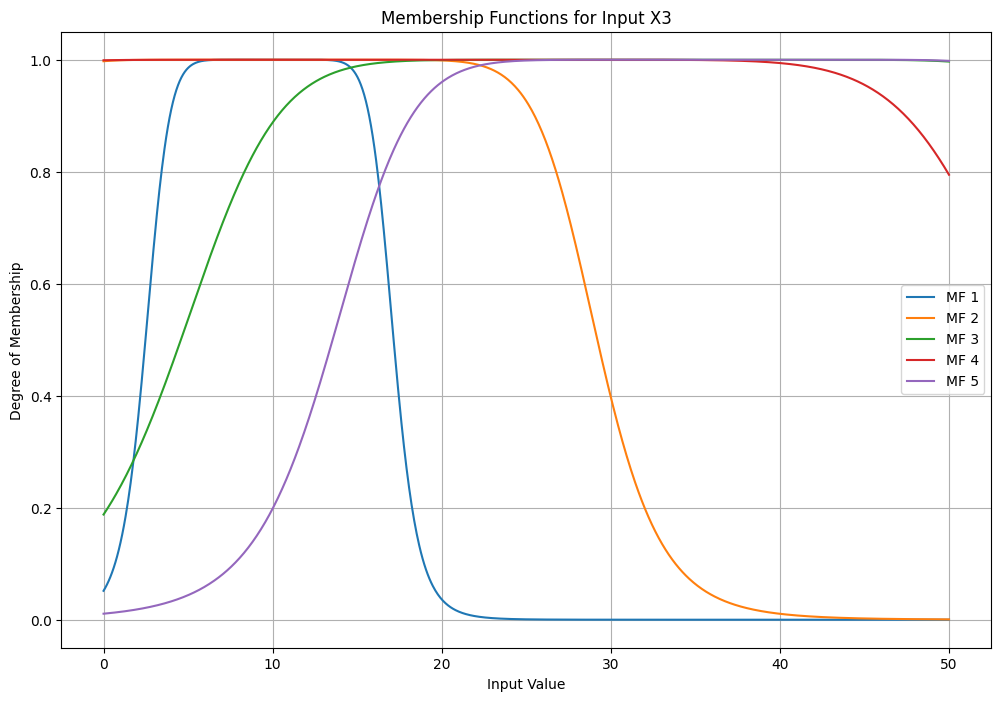

In [5]:
model.layers[1].plot_membership([10, 25, 50])